# 08-11-2025

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [6]:
df = pd.read_csv('green_tech_data.csv')
df.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbon_emissions    100 non-null    float64
 1   energy_output       100 non-null    float64
 2   renewability_index  100 non-null    float64
 3   cost_efficiency     100 non-null    float64
 4   sustainability      100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [8]:
X = df.drop('sustainability', axis=1)

In [9]:
y = df['sustainability']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)

Accuracy Score :  95.0


Classification Report

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.89        20
weighted avg       0.95      0.95      0.95        20




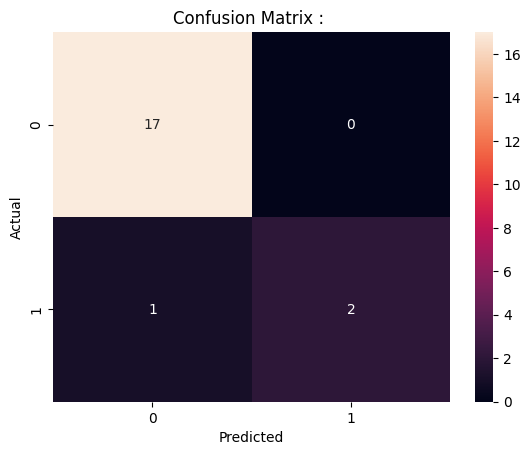

In [13]:
con = confusion_matrix(y_test, y_pred)
print('Accuracy Score : ', accuracy_score(y_test, y_pred)*100)
print('\n')
print('Classification Report')
print('\n', '='*50)
print(classification_report(y_test, y_pred))
print('\n', '='*50)


plt.title('Confusion Matrix : ')
sns.heatmap(con, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
import pickle
with open('lrmodel_sustainable.pkl', 'wb') as file:
    pickle.dump(model, file)